### Initial package imports

In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from typing import Dict, List
import random
from matplotlib.gridspec import GridSpec

# Validation files

In [9]:

asset_df = pd.read_csv('Data/a3/Data_assignment3.csv', sep=';')
asset_df.set_index('Date', inplace=True)
asset_df = asset_df.loc['04/01/2012':]

currency_df = asset_df[['EUR/USD', 'EUR/JPY']]
#drop na
currency_df.dropna(inplace=True)
asset_df.dropna(inplace=True)
display(currency_df.tail())
display(asset_df.head())



/var/folders/8l/w3h2llvd3nd7712wt9bl0vkm0000gn/T/ipykernel_55873/813508868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency_df.dropna(inplace=True)


,EUR/USD,EUR/JPY
Date,,
26/12/2022,1.0635,142.65
27/12/2022,1.0638,141.80
28/12/2022,1.0608,140.31
29/12/2022,1.0661,141.80
30/12/2022,1.0702,140.31


,S&P500,Dax40,Nikkei,EUR/USD,EUR/JPY,Boeing,Airbus,Volkswagen,ASML,NVIDIA,Stellantis
Date,,,,,,,,,,,
04/01/2012,1277.30,6111.55,8560.11,1.2940,99.26,74.33,24.3204,108.887,41.5584,0.3550,12.965
05/01/2012,1281.06,6095.99,8488.71,1.2780,98.64,73.53,24.3849,112.200,41.3117,0.3678,12.635
06/01/2012,1277.81,6057.92,8390.35,1.2720,97.90,73.98,24.7076,110.715,41.7013,0.3635,12.800
09/01/2012,1280.70,6017.23,8390.35,1.2765,98.05,74.53,24.5835,109.550,42.0779,0.3635,12.235
10/01/2012,1292.08,6162.98,8422.26,1.2772,98.13,75.00,24.6827,111.982,42.1818,0.3620,12.920


In [10]:
#create log returns of all columns
currency_df['EUR/USD'] = np.log(currency_df['EUR/USD'] / currency_df['EUR/USD'].shift(1))
currency_df['EUR/JPY'] = np.log(currency_df['EUR/JPY'] / currency_df['EUR/JPY'].shift(1))

#create log returns for all assets in asset_df
asset_df['R_S&P500'] = np.log(asset_df['S&P500'] / asset_df['S&P500'].shift(1))
asset_df['R_Dax40'] = np.log(asset_df['Dax40'] / asset_df['Dax40'].shift(1))
asset_df['R_Nikkei'] = np.log(asset_df['Nikkei'] / asset_df['Nikkei'].shift(1))
asset_df['R_Boeing'] = np.log(asset_df['Boeing'] / asset_df['Boeing'].shift(1))
asset_df['R_Airbus'] = np.log(asset_df['Airbus'] / asset_df['Airbus'].shift(1))
asset_df['R_Volkswagen'] = np.log(asset_df['Volkswagen'] / asset_df['Volkswagen'].shift(1))
asset_df['R_ASML'] = np.log(asset_df['ASML'] / asset_df['ASML'].shift(1))
asset_df['R_NVIDIA'] = np.log(asset_df['NVIDIA'] / asset_df['NVIDIA'].shift(1))
asset_df['R_Stellantis'] = np.log(asset_df['Stellantis'] / asset_df['Stellantis'].shift(1))

display(asset_df.head())
asset_df.dropna(inplace=True)


display(currency_df.head())
currency_df.dropna(inplace=True)


/var/folders/8l/w3h2llvd3nd7712wt9bl0vkm0000gn/T/ipykernel_55873/4272461861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency_df['EUR/USD'] = np.log(currency_df['EUR/USD'] / currency_df['EUR/USD'].shift(1))
/var/folders/8l/w3h2llvd3nd7712wt9bl0vkm0000gn/T/ipykernel_55873/4272461861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency_df['EUR/JPY'] = np.log(currency_df['EUR/JPY'] / currency_df['EUR/JPY'].shift(1))


,S&P500,Dax40,Nikkei,EUR/USD,EUR/JPY,Boeing,Airbus,Volkswagen,ASML,NVIDIA,Stellantis,R_S&P500,R_Dax40,R_Nikkei,R_Boeing,R_Airbus,R_Volkswagen,R_ASML,R_NVIDIA,R_Stellantis
Date,,,,,,,,,,,,,,,,,,,,
04/01/2012,1277.30,6111.55,8560.11,1.2940,99.26,74.33,24.3204,108.887,41.5584,0.3550,12.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05/01/2012,1281.06,6095.99,8488.71,1.2780,98.64,73.53,24.3849,112.200,41.3117,0.3678,12.635,0.002939,-0.002549,-0.008376,-0.010821,0.002649,0.029972,-0.005954,0.035422,-0.025783
06/01/2012,1277.81,6057.92,8390.35,1.2720,97.90,73.98,24.7076,110.715,41.7013,0.3635,12.800,-0.002540,-0.006265,-0.011655,0.006101,0.013147,-0.013324,0.009387,-0.011760,0.012974
09/01/2012,1280.70,6017.23,8390.35,1.2765,98.05,74.53,24.5835,109.550,42.0779,0.3635,12.235,0.002259,-0.006739,0.000000,0.007407,-0.005035,-0.010578,0.008990,0.000000,-0.045144
10/01/2012,1292.08,6162.98,8422.26,1.2772,98.13,75.00,24.6827,111.982,42.1818,0.3620,12.920,0.008847,0.023933,0.003796,0.006286,0.004027,0.021957,0.002466,-0.004135,0.054476


,EUR/USD,EUR/JPY
Date,,
04/01/2012,NaN,NaN
05/01/2012,-0.012442,-0.006266
06/01/2012,-0.004706,-0.007530
09/01/2012,0.003531,0.001531
10/01/2012,0.000548,0.000816


/var/folders/8l/w3h2llvd3nd7712wt9bl0vkm0000gn/T/ipykernel_55873/4272461861.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency_df.dropna(inplace=True)


In [11]:
#corrected returns to EURO
asset_df['C_S&P500'] = (1 + asset_df['R_S&P500']) * (1 + currency_df['EUR/USD']) - 1
asset_df['C_Nikkei'] = (1 + asset_df['R_Nikkei']) * (1 + currency_df['EUR/JPY']) - 1 
asset_df['C_Dax40'] = asset_df['R_Dax40']
asset_df['C_Boeing'] = (1 + asset_df['R_Boeing']) * (1 + currency_df['EUR/USD']) - 1
asset_df['C_Airbus'] = asset_df['R_Airbus']
asset_df['C_Volkswagen'] = asset_df['R_Volkswagen']
asset_df['C_ASML'] = asset_df['R_ASML']
asset_df['C_NVIDIA'] = (1 + asset_df['R_NVIDIA']) * (1 + currency_df['EUR/USD']) - 1
asset_df['C_Stellantis'] = asset_df['R_Stellantis']
asset_df.dropna(inplace=True)
display(asset_df.head())

,S&P500,Dax40,Nikkei,EUR/USD,EUR/JPY,Boeing,Airbus,Volkswagen,ASML,NVIDIA,...,R_Stellantis,C_S&P500,C_Nikkei,C_Dax40,C_Boeing,C_Airbus,C_Volkswagen,C_ASML,C_NVIDIA,C_Stellantis
Date,,,,,,,,,,,,,,,,,,,,,
05/01/2012,1281.06,6095.99,8488.71,1.2780,98.64,73.53,24.3849,112.200,41.3117,0.3678,...,-0.025783,-0.009539,-0.014589,-0.002549,-0.023128,0.002649,0.029972,-0.005954,0.022539,-0.025783
06/01/2012,1277.81,6057.92,8390.35,1.2720,97.90,73.98,24.7076,110.715,41.7013,0.3635,...,0.012974,-0.007234,-0.019097,-0.006265,0.001367,0.013147,-0.013324,0.009387,-0.016411,0.012974
09/01/2012,1280.70,6017.23,8390.35,1.2765,98.05,74.53,24.5835,109.550,42.0779,0.3635,...,-0.045144,0.005799,0.001531,-0.006739,0.010965,-0.005035,-0.010578,0.008990,0.003531,-0.045144
10/01/2012,1292.08,6162.98,8422.26,1.2772,98.13,75.00,24.6827,111.982,42.1818,0.3620,...,0.054476,0.009400,0.004615,0.023933,0.006838,0.004027,0.021957,0.002466,-0.003589,0.054476
11/01/2012,1292.48,6152.34,8447.88,1.2703,97.64,74.74,24.8465,114.350,42.5519,0.3548,...,0.002319,-0.005109,-0.001984,-0.001728,-0.008871,0.006614,0.020926,0.008736,-0.025398,0.002319


In [16]:
bond_df = pd.read_csv('Data/a1/ECB_Data_10yr_Treasury_bond.csv', sep=',')
bond_df.drop('TIME PERIOD', axis=1, inplace=True)
bond_df['Date'] = pd.to_datetime(bond_df['Date'], format='%Y-%m-%d')
#now change the format to dd/mm/yyyy
bond_df['Date'] = bond_df['Date'].dt.strftime('%d/%m/%Y')
bond_df.set_index('Date', inplace=True)
bond_df = bond_df.loc['05/01/2012':]  # Use consistent date format
bond_df = bond_df.rename(columns={'Yield curve spot rate, 10-year maturity - Government bond': 'Bond_Yield'})
asset_df = pd.merge(asset_df, bond_df, left_index=True, right_index=True, how='left')
display(asset_df.head())

,S&P500,Dax40,Nikkei,EUR/USD,EUR/JPY,Boeing,Airbus,Volkswagen,ASML,NVIDIA,...,C_Boeing,C_Airbus,C_Volkswagen,C_ASML,C_NVIDIA,C_Stellantis,Bond_Yield_x,Interest_Bond_daily_rate,Bond_Yield_y,Bond_Yield
Date,,,,,,,,,,,,,,,,,,,,,
05/01/2012,1281.06,6095.99,8488.71,1.2780,98.64,73.53,24.3849,112.200,41.3117,0.3678,...,-0.023128,0.002649,0.029972,-0.005954,0.022539,-0.025783,2.784807,0.000164,2.784807,2.784807
06/01/2012,1277.81,6057.92,8390.35,1.2720,97.90,73.98,24.7076,110.715,41.7013,0.3635,...,0.001367,0.013147,-0.013324,0.009387,-0.016411,0.012974,2.788371,0.000164,2.788371,2.788371
09/01/2012,1280.70,6017.23,8390.35,1.2765,98.05,74.53,24.5835,109.550,42.0779,0.3635,...,0.010965,-0.005035,-0.010578,0.008990,0.003531,-0.045144,2.757489,0.000163,2.757489,2.757489
10/01/2012,1292.08,6162.98,8422.26,1.2772,98.13,75.00,24.6827,111.982,42.1818,0.3620,...,0.006838,0.004027,0.021957,0.002466,-0.003589,0.054476,2.746027,0.000163,2.746027,2.746027
11/01/2012,1292.48,6152.34,8447.88,1.2703,97.64,74.74,24.8465,114.350,42.5519,0.3548,...,-0.008871,0.006614,0.020926,0.008736,-0.025398,0.002319,2.690639,0.000161,2.690639,2.690639


In [17]:
	# Add a column for the interest bond value per day
days_per_annum = 365
interest_bond = 1500000

# Initialize the arrays with appropriate lengths matching the DataFrame
daily_rates = np.zeros(len(asset_df))

# Set initial value

# Calculate bond values day by day based on the daily yield rate
for i in range(len(asset_df)):
    # Adding 1.5% to account for the credit risk spread
    daily_rate = (((asset_df['Bond_Yield'].iloc[i] + 1.5) / (days_per_annum)) * (7/5)) / 100
    daily_rates[i] = daily_rate
# Add vectors to the dataframe
asset_df['Interest_Bond_daily_rate'] = daily_rates
display(asset_df.head())

,S&P500,Dax40,Nikkei,EUR/USD,EUR/JPY,Boeing,Airbus,Volkswagen,ASML,NVIDIA,...,C_Boeing,C_Airbus,C_Volkswagen,C_ASML,C_NVIDIA,C_Stellantis,Bond_Yield_x,Interest_Bond_daily_rate,Bond_Yield_y,Bond_Yield
Date,,,,,,,,,,,,,,,,,,,,,
05/01/2012,1281.06,6095.99,8488.71,1.2780,98.64,73.53,24.3849,112.200,41.3117,0.3678,...,-0.023128,0.002649,0.029972,-0.005954,0.022539,-0.025783,2.784807,0.000164,2.784807,2.784807
06/01/2012,1277.81,6057.92,8390.35,1.2720,97.90,73.98,24.7076,110.715,41.7013,0.3635,...,0.001367,0.013147,-0.013324,0.009387,-0.016411,0.012974,2.788371,0.000164,2.788371,2.788371
09/01/2012,1280.70,6017.23,8390.35,1.2765,98.05,74.53,24.5835,109.550,42.0779,0.3635,...,0.010965,-0.005035,-0.010578,0.008990,0.003531,-0.045144,2.757489,0.000163,2.757489,2.757489
10/01/2012,1292.08,6162.98,8422.26,1.2772,98.13,75.00,24.6827,111.982,42.1818,0.3620,...,0.006838,0.004027,0.021957,0.002466,-0.003589,0.054476,2.746027,0.000163,2.746027,2.746027
11/01/2012,1292.48,6152.34,8447.88,1.2703,97.64,74.74,24.8465,114.350,42.5519,0.3548,...,-0.008871,0.006614,0.020926,0.008736,-0.025398,0.002319,2.690639,0.000161,2.690639,2.690639


# Copulas

For the return pairs we have chosen the following:

- Boeing and Airbus
- ASML and NVIDIA
- Volkswagen and Stellantis 


### Fit appropriate marginal distributions

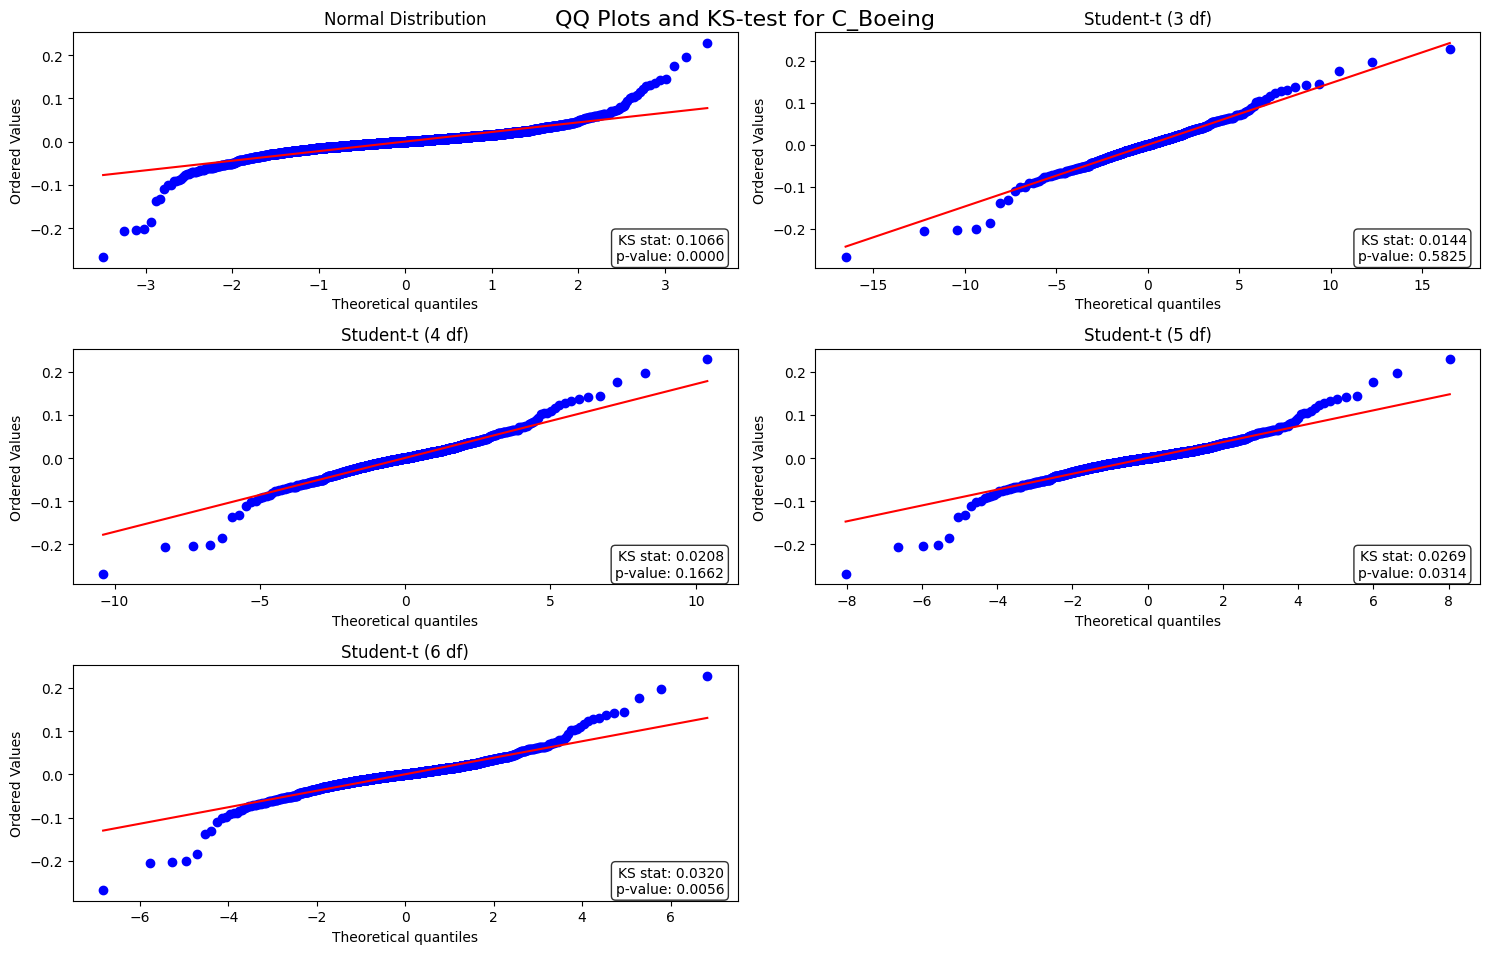

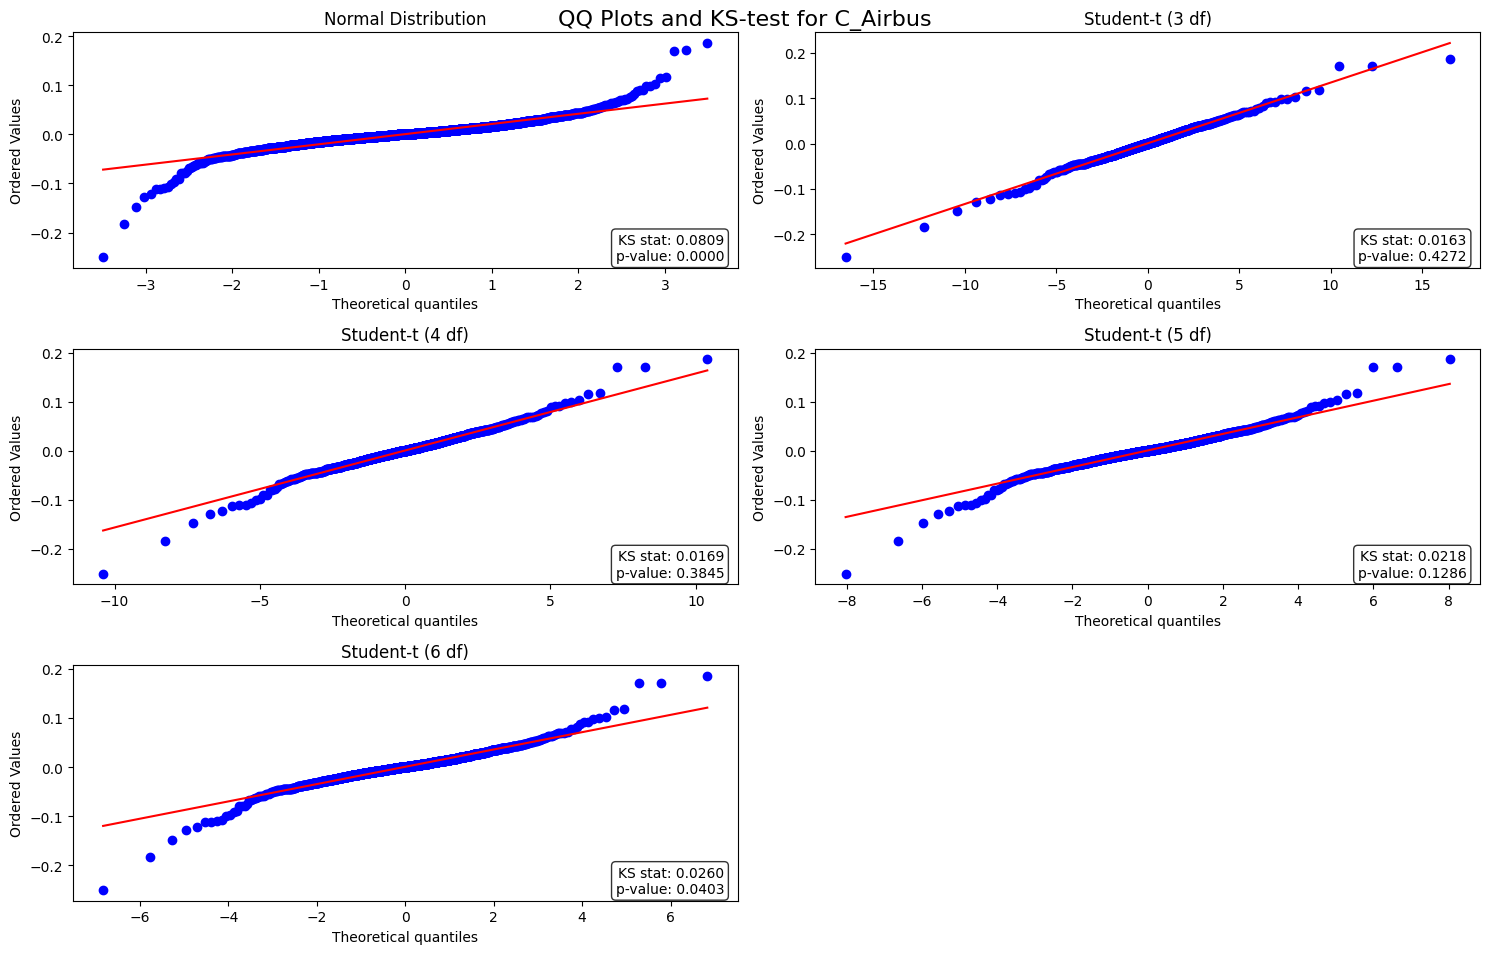

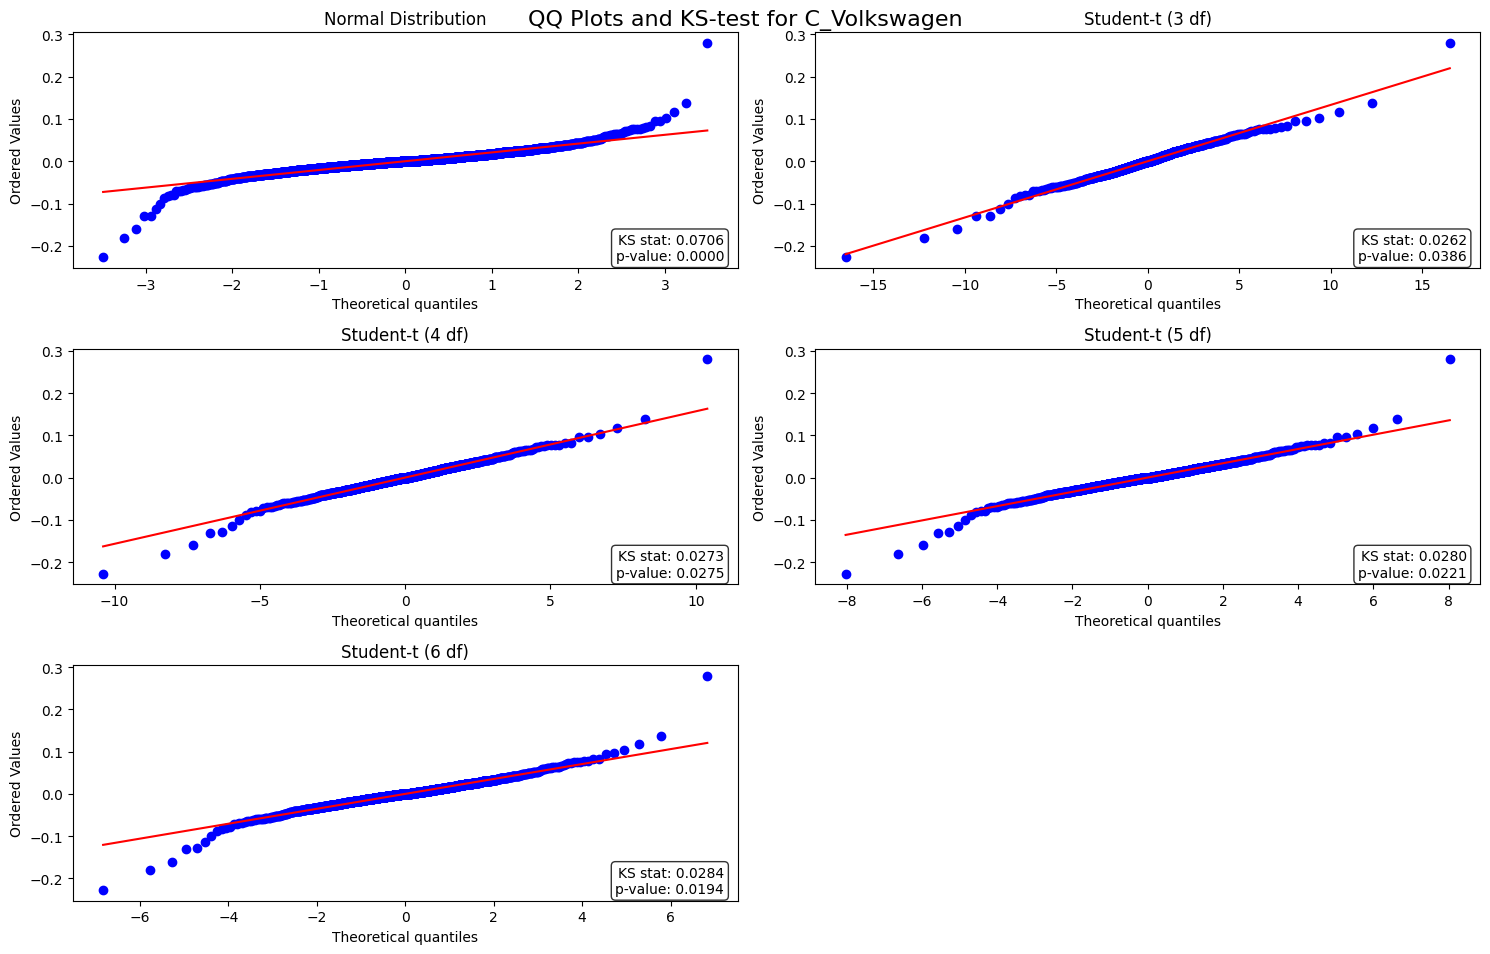

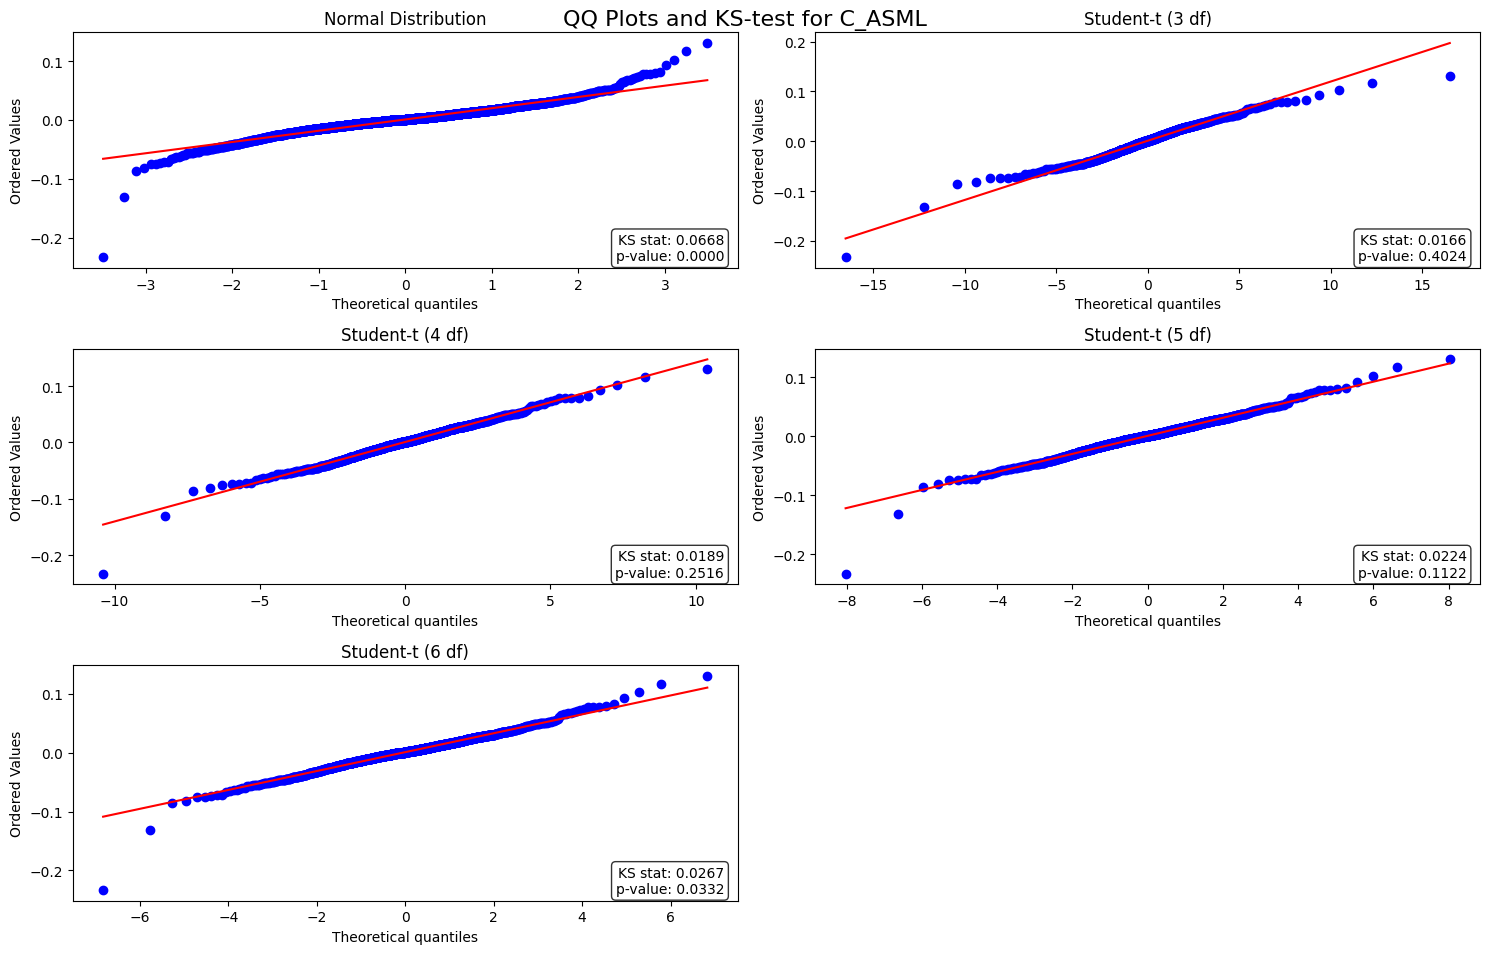

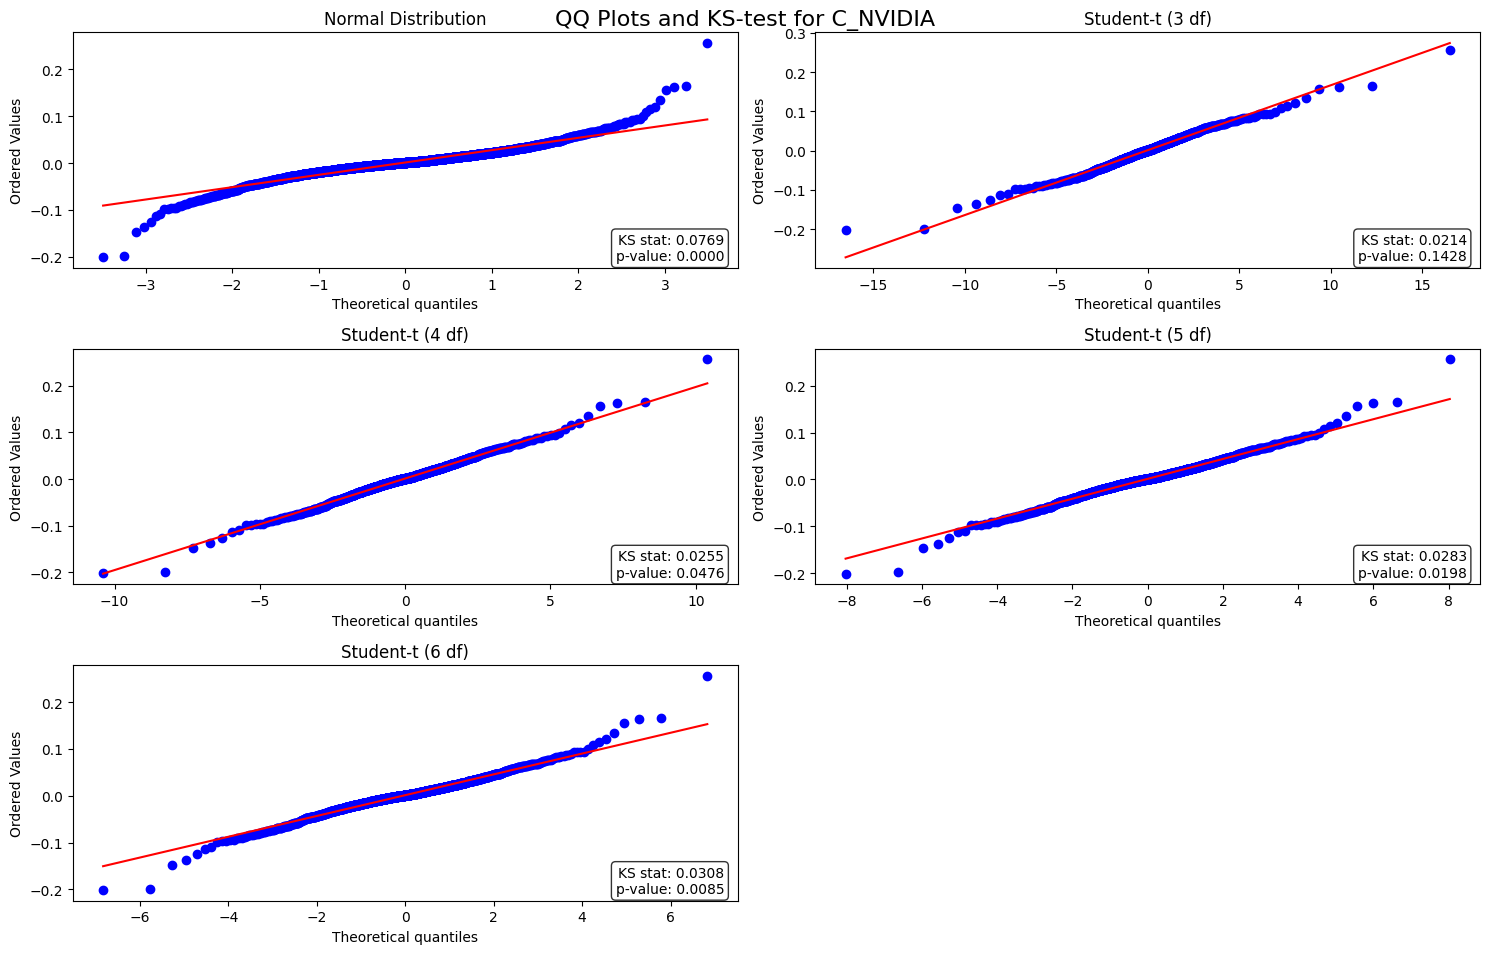

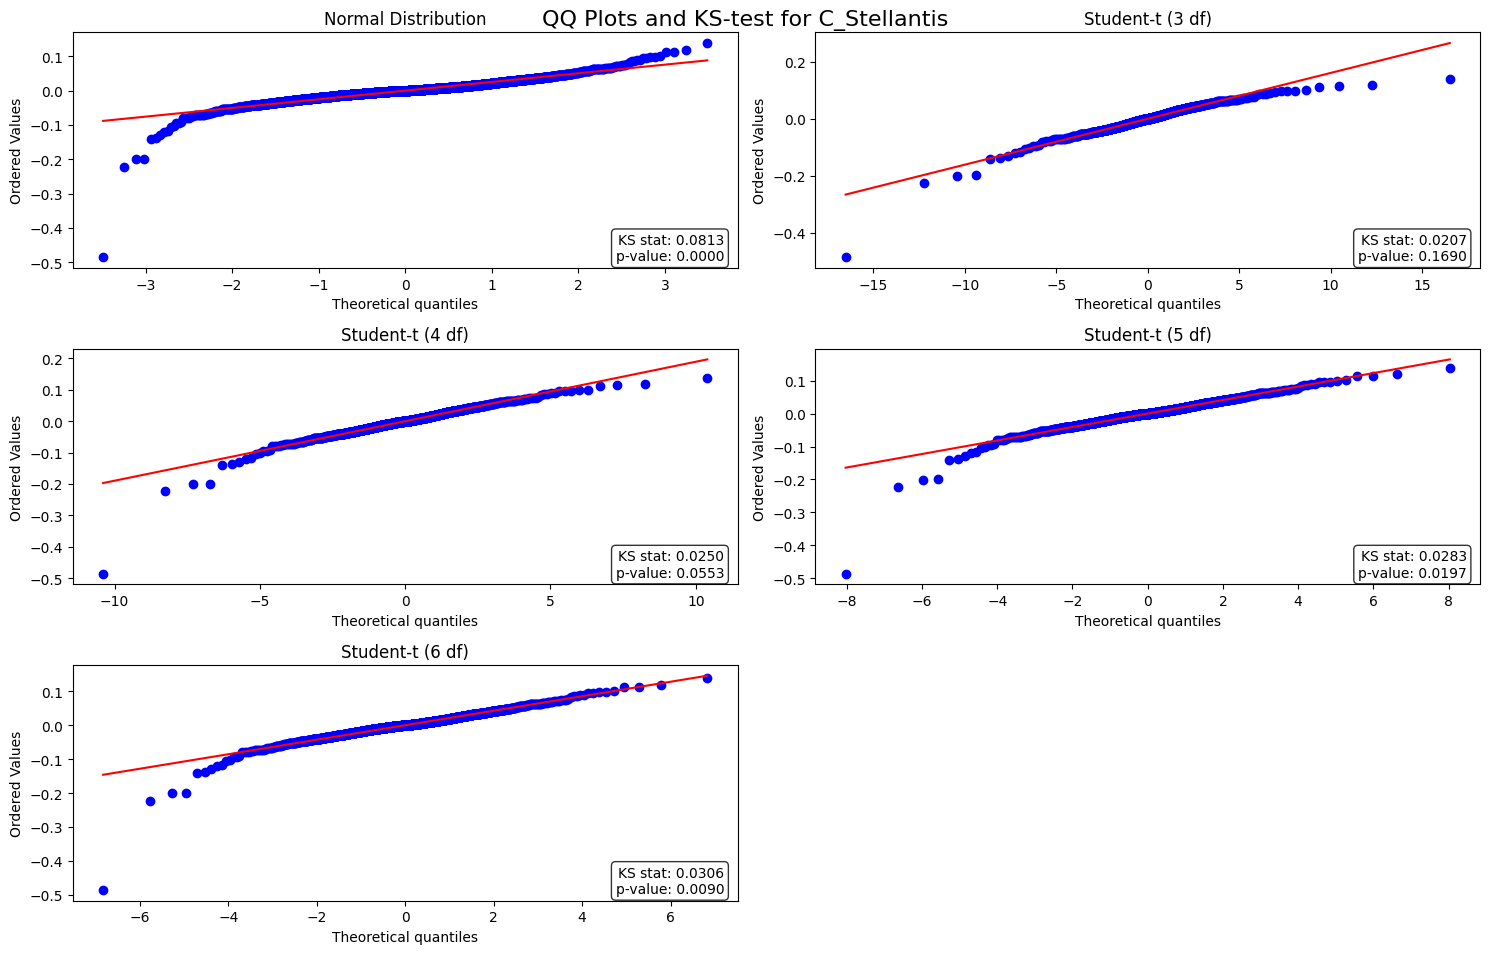

In [ ]:
# Create subplots for each asset
for asset in assets:
    fig = plt.figure(figsize=(15, 10))
    plt.suptitle(f'QQ Plots and KS-test for {asset}', fontsize=16, y=0.95)
    
    # Create 5 subplots
    distributions = [
        (st.norm, 'Normal Distribution', None),
        (st.t, 'Student-t (3 df)', (3,)),
        (st.t, 'Student-t (4 df)', (4,)),
        (st.t, 'Student-t (5 df)', (5,)),
        (st.t, 'Student-t (6 df)', (6,))
    ]
    
    for idx, (dist, title, params) in enumerate(distributions, 1):
        ax = plt.subplot(3, 2, idx)
        
        # Perform KS test
        data = asset_df[asset]
        if params:
            params_fitted = dist.fit(data, fix_df=params[0])
            ks_stat, p_value = st.kstest(data, dist.name, args=params_fitted)
        else:
            params_fitted = dist.fit(data)
            ks_stat, p_value = st.kstest(data, dist.name, args=params_fitted)
        
        # Create QQ plot
        if params:
            st.probplot(data, dist=dist, sparams=params, plot=plt)
        else:
            st.probplot(data, dist=dist, plot=plt)
            
        plt.title(title)
        
        # Add KS-test results in bottom right
        text = f'KS stat: {ks_stat:.4f}\np-value: {p_value:.4f}'
        plt.text(0.98, 0.02, text, transform=ax.transAxes,
                verticalalignment='bottom', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
